<a href="https://colab.research.google.com/github/MCanhisares/DLStudies/blob/master/PyTorchForDLS7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torchvision import datasets, transforms

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image


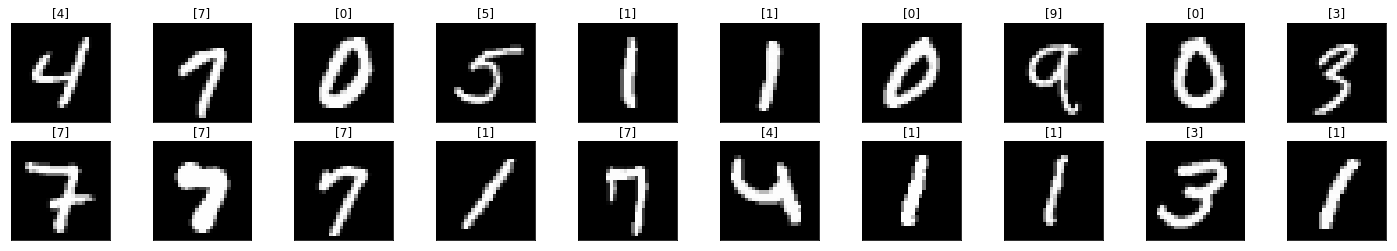

In [4]:
dataiter = iter(training_loader)
images,labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10,idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [0]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1,H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2, D_out)
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [6]:
model = Classifier(28*28, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [8]:
epochs = 12
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []
for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)    
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
      
        _, val_preds = torch.max(val_outputs, 1)    
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
    
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)    
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    
    print(f'epoch {e + 1}')
    print('training loss: {:.4f}, {:.4f}'.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))

epoch 1
training loss: 0.0094, 0.7649
validation loss: 0.0044, 0.8850
epoch 2
training loss: 0.0038, 0.8903
validation loss: 0.0033, 0.9061
epoch 3
training loss: 0.0032, 0.9065
validation loss: 0.0029, 0.9157
epoch 4
training loss: 0.0029, 0.9157
validation loss: 0.0027, 0.9214
epoch 5
training loss: 0.0027, 0.9229
validation loss: 0.0025, 0.9291
epoch 6
training loss: 0.0025, 0.9291
validation loss: 0.0023, 0.9325
epoch 7
training loss: 0.0023, 0.9340
validation loss: 0.0022, 0.9368
epoch 8
training loss: 0.0021, 0.9392
validation loss: 0.0021, 0.9396
epoch 9
training loss: 0.0020, 0.9435
validation loss: 0.0019, 0.9425
epoch 10
training loss: 0.0018, 0.9469
validation loss: 0.0018, 0.9463
epoch 11
training loss: 0.0017, 0.9500
validation loss: 0.0017, 0.9475
epoch 12
training loss: 0.0016, 0.9522
validation loss: 0.0017, 0.9484


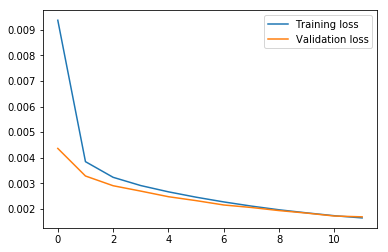

In [9]:
plt.plot(running_loss_history, label='Training loss')
plt.plot(val_running_loss_history, label='Validation loss')
plt.legend()

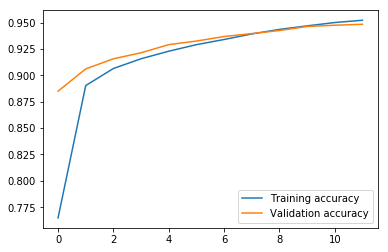

In [10]:
plt.plot(running_corrects_history, label='Training accuracy')
plt.plot(val_running_corrects_history, label='Validation accuracy')
plt.legend()

In [0]:
import PIL.ImageOps

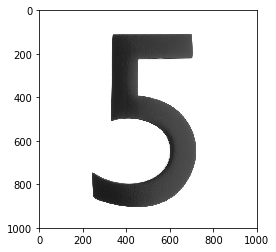

In [12]:
import requests
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)


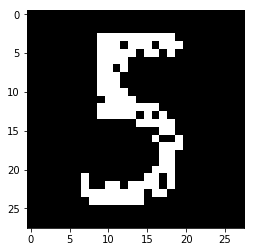

In [13]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

In [14]:
img = img.view(img.shape[0], -1)
output = model(img)     
_, pred = torch.max(output, 1) 
print(pred.item())

5


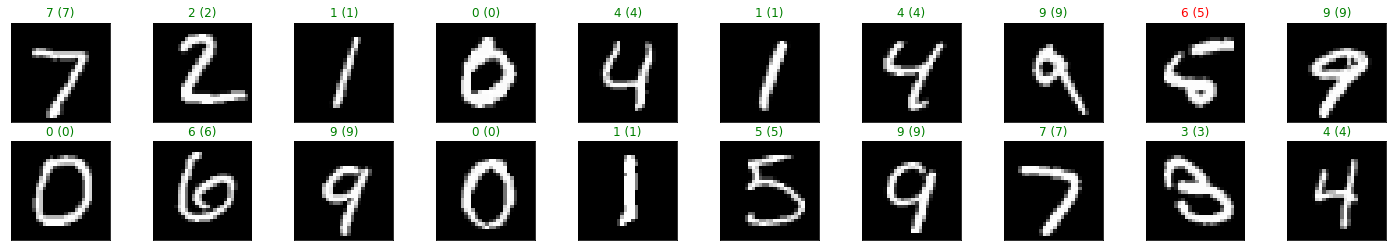

In [15]:
dataiter = iter(validation_loader)
images,labels = dataiter.next()
images_ = images.view(images.shape[0], -1)
output = model(images_)    
_, preds = torch.max(output, 1) 

fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10,idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red") )